Virat Kohli : Batting Analysis (2008-2018):

Virat Kohli is an Indian cricketer. He was born in Delhi, India on November 5, 1988. Virat is the first player in ICC cricket history to win all 3 ICC awards in a single year- ICC ODI player of the year, ICC Test player of the year and ICC Player of the year award in 2018.

Born: November 5, 1988, Delhi, India

Team: India national cricket team

Sport: Cricket

Nationality: India

Data Dictionary

    RunsScored : Number of Runs scored by Kohli in the match.
    BallsFaced : Number of Balls Faces by Kohli in the match.
    BattingPosition : Batting position is Virat Kohli's position on the batting order.
    Dismissal : How Kohli got out in the match or not out. Caught, NO: Not Out, Bowled, Run out, LBW, Stumped, Hit wicket.
    Inning : An innings is one of the divisions of a match during which one team takes its turn to bat. Two 1st inning or 2nd inning.
    Opposition : Name of the Opposition team.
    Year : Year in which the match was played.




In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from warnings import filterwarnings
filterwarnings("ignore")

In [4]:
# Reading Bastman details file
mydata = pd.read_csv('Batsman.csv')

In [5]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   RunsScored       208 non-null    int64 
 1   BallsFaced       208 non-null    int64 
 2   BattingPosition  208 non-null    int64 
 3   Dismissal        208 non-null    object
 4   Inning           208 non-null    int64 
 5   Opposition       208 non-null    object
 6   Year             208 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 11.5+ KB


In [8]:
# shape of the data 
mydata.shape

(208, 7)

In [9]:
# checking for null values
mydata.isnull().sum()

RunsScored         0
BallsFaced         0
BattingPosition    0
Dismissal          0
Inning             0
Opposition         0
Year               0
dtype: int64

In [10]:
# descriptive summary
mydata.describe()

,RunsScored,BallsFaced,BattingPosition,Inning,Year
count,208.000000,208.000000,208.000000,208.000000,208.000000
mean,49.192308,52.961538,3.264423,1.567308,2013.240385
std,43.797641,39.850548,0.781602,0.496644,2.750477
min,0.000000,0.000000,1.000000,1.000000,2008.000000
25%,10.750000,18.000000,3.000000,1.000000,2011.000000
50%,35.000000,46.500000,3.000000,2.000000,2013.000000
75%,81.250000,83.250000,3.000000,2.000000,2015.000000
max,183.000000,159.000000,7.000000,2.000000,2018.000000


In [11]:
# Descriptive summary for Numeric and Categorical variables
mydata.describe(include='all')

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
count,208.000000,208.000000,208.000000,208,208.000000,208,208.000000
unique,NaN,NaN,NaN,7,NaN,12,NaN
top,NaN,NaN,NaN,Caught,NaN,Sri Lanka,NaN
freq,NaN,NaN,NaN,121,NaN,45,NaN
mean,49.192308,52.961538,3.264423,NaN,1.567308,NaN,2013.240385
std,43.797641,39.850548,0.781602,NaN,0.496644,NaN,2.750477
min,0.000000,0.000000,1.000000,NaN,1.000000,NaN,2008.000000
25%,10.750000,18.000000,3.000000,NaN,1.000000,NaN,2011.000000
50%,35.000000,46.500000,3.000000,NaN,2.000000,NaN,2013.000000
75%,81.250000,83.250000,3.000000,NaN,2.000000,NaN,2015.000000


### 1. percentage for Kohli being Not Out.

In [12]:
mydata["Dismissal"].value_counts()

Caught        121
NO             37
Bowled         21
LBW            12
Run out        12
Stumped         4
Hit wicket      1
Name: Dismissal, dtype: int64

In [13]:
mydata["Dismissal"].value_counts().index

Index(['Caught', 'NO', 'Bowled', 'LBW', 'Run out', 'Stumped', 'Hit wicket'], dtype='object')

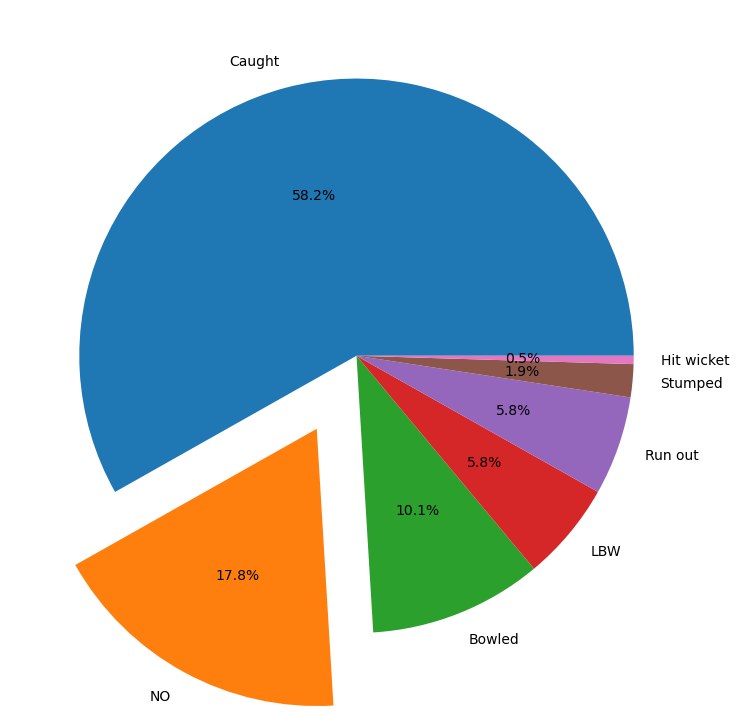

In [15]:
#import matplotlib.pyplot as plt
plt.figure(figsize=(9,9))
plt.pie(mydata['Dismissal'].value_counts(),labels=mydata["Dismissal"].value_counts().index,autopct='%1.1f%%',explode = (0,0.30,0,0,0,0,0))
# autopct="%.1f%%" is used here display the percentage in the pie-chart upto 1 deciaml place
# explode = (0, 0.30, 0, 0,0,0,0) is used here to take the Not Out portion little out(30%) of the pie-chart
plt.show()

### 2. the number of times when kohli scored less than or equal to 7 runs?

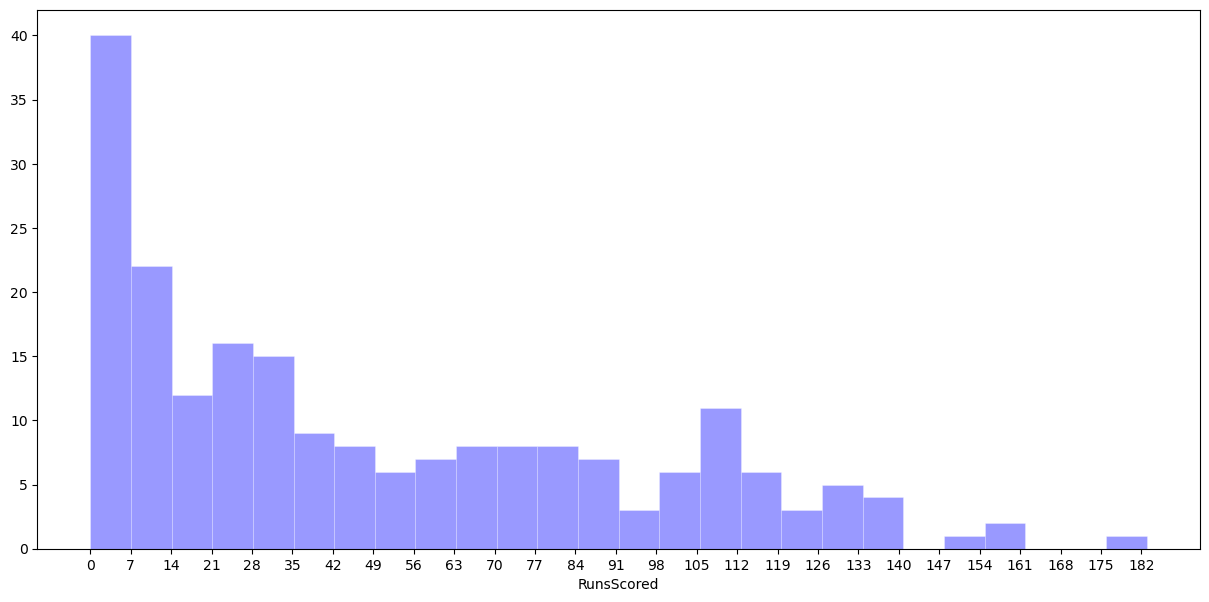

In [18]:
# Histogram of runs scored
plt.figure(figsize=(15,7))
sns.distplot(mydata["RunsScored"],bins= 26,kde =False,color = 'b',hist_kws={'linewidth':0.5 ,'edgecolor': 'white'})
# bins = 26: As the maximum score scored by Kohli is around 183 and we are trying to divide it in equal sized bins (7). 183/7~26
# kde = False: as KDE plot is not expected to be displayed in the question.
# hist_kws = {'linewidth' : 0.5,'edgecolor' : 'white'}: To uniquely identify each bin with a white line btw each of them of width 0.5
plt.xticks(np.arange(0,183,7))# This code gives the values for X-Axis with step size of 7 in the range starting from 0 to 182
plt.show()



#### The plot shows that Kohli has scored less than or equal to 7 runs for 40 times out of all of his ODI innings.

#### Note all the bins represent 7 runs. Student can try for other scores and bin sizes on their own for practice


### 4. Use Boxplot to tell the IQR( Inter Quartile Range) middle 50% of runs scored by Kohli?


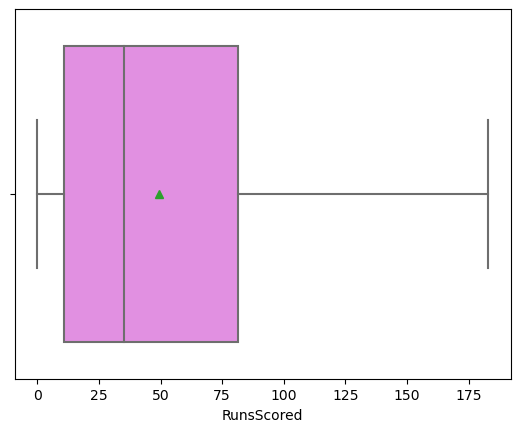

In [19]:
sns.boxplot(x= 'RunsScored',color = 'violet', data = mydata, showmeans= True)
plt.show()

In [21]:
mydata["RunsScored"].quantile(.25) #Q1

10.75

In [22]:
mydata["RunsScored"].quantile(.75) #Q2

81.25

In [23]:
81.25 - 10.75

70.5

### From the boxplot we can see that middle 50% range of runs scored by Kohli lie between 10.75 and 81.25 runs.

### best way that the opposition team bowlers can get Kohli out?
##### How Kohli got di|smissed most of the times?

In [37]:
#converting the 'Dismissal' column to a categorical data type using the astype() method of pandas

mydata['Dismissal'] = mydata['Dismissal'].astype('category')

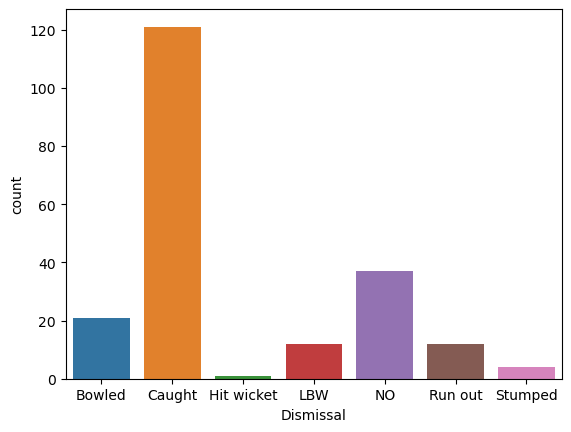

In [39]:
sns.countplot(data=mydata, x='Dismissal')
plt.show()

The most number of times Kohli has got out is by getting caught.

### 6. Games played against the teams.

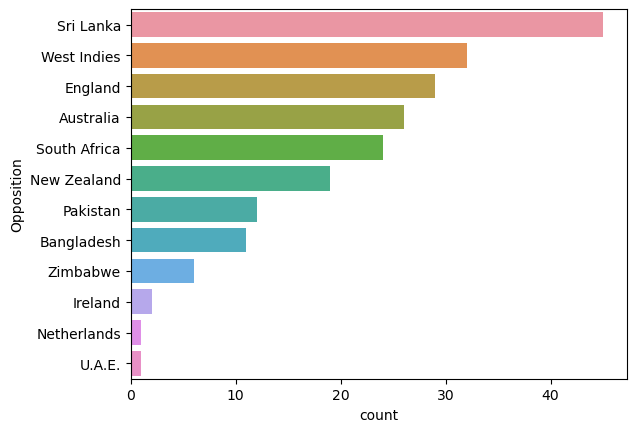

In [40]:
sns.countplot(y=mydata['Opposition'],order = mydata['Opposition'].value_counts().index)
plt.show()

#### Most number of games  played are against srilanka

### 7. Some interesting dismissal patterns in Kohli's career againsts the oppositions.

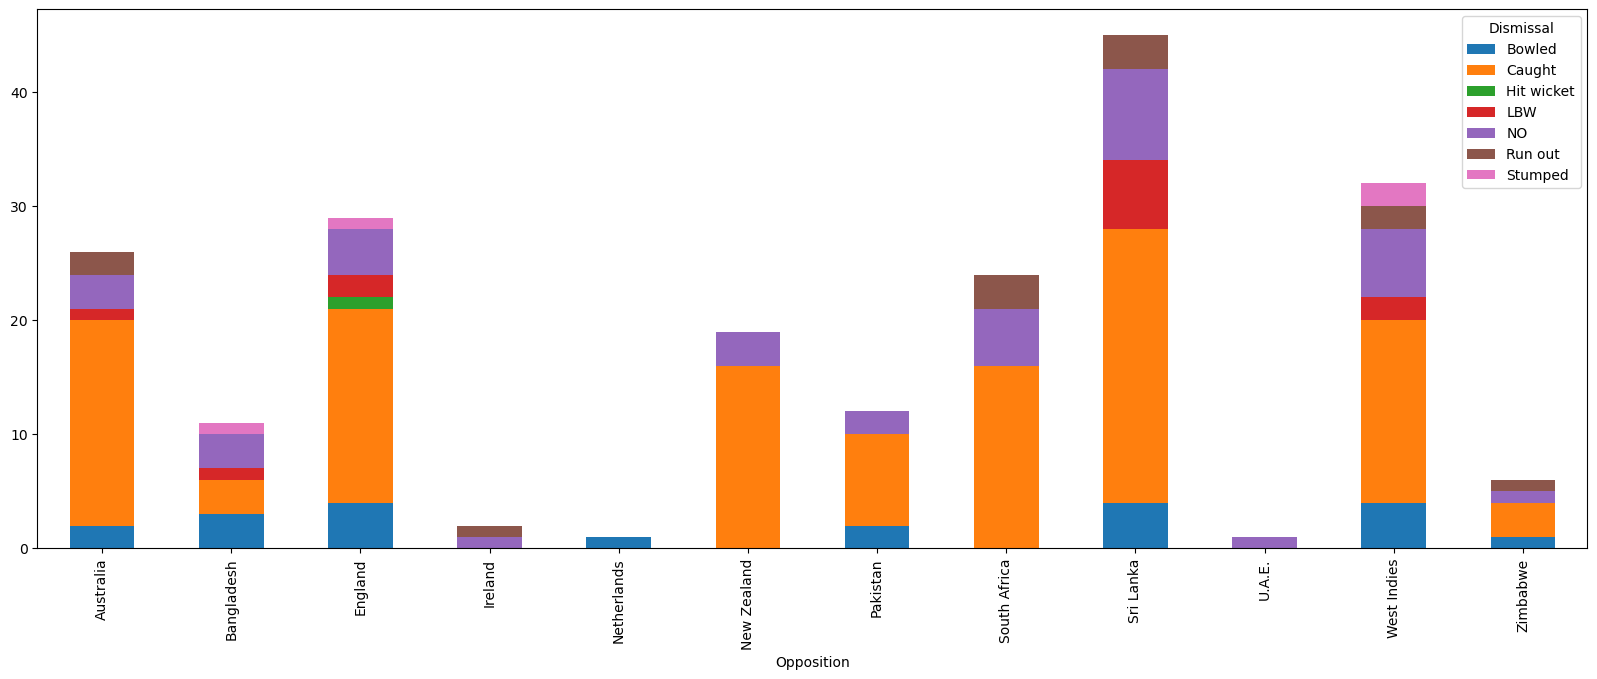

In [42]:
ct= pd.crosstab(mydata['Opposition'],mydata['Dismissal'],margins =True)
ct.drop("All",inplace= True)
ct.drop("All",axis =1 ,inplace = True)
ct.plot.bar(stacked=True, figsize = (20,7))
plt.show()



The one time Netherlands has been able to dismiss Kohli is by getting him bowled.

He has stayed not-out against UAE in the one match he played/did not get a chance to bat against them.

He has got out by hit wicket against England.

Interestingly, he has been dismissed by New Zealand only by catching.

No other team has been able to stump him other than Bangladesh, England and West Indies


### 8. Most runs scored against opposition. Median score against different opposition 

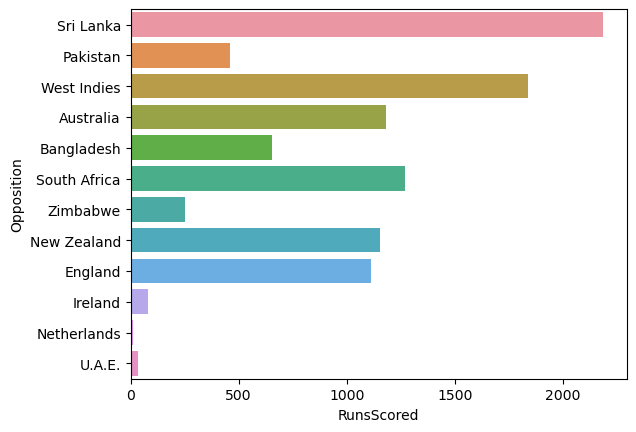

In [43]:
# Bar plot of Total runs scored against each Oppostion
sns.barplot( x='RunsScored', y='Opposition', estimator = np.sum, data=mydata, ci=None)
# ci=None: Display of confidence intervals is not expected
#estimator = np.sum: Statistical function to estimate within each categorical bin sum wise
plt.show()

#### As the total runs scored would depend on the number of matches played against an opposition. May be that is why SriLanka coming at the top here. Let us check whether boxplot tells the same story.

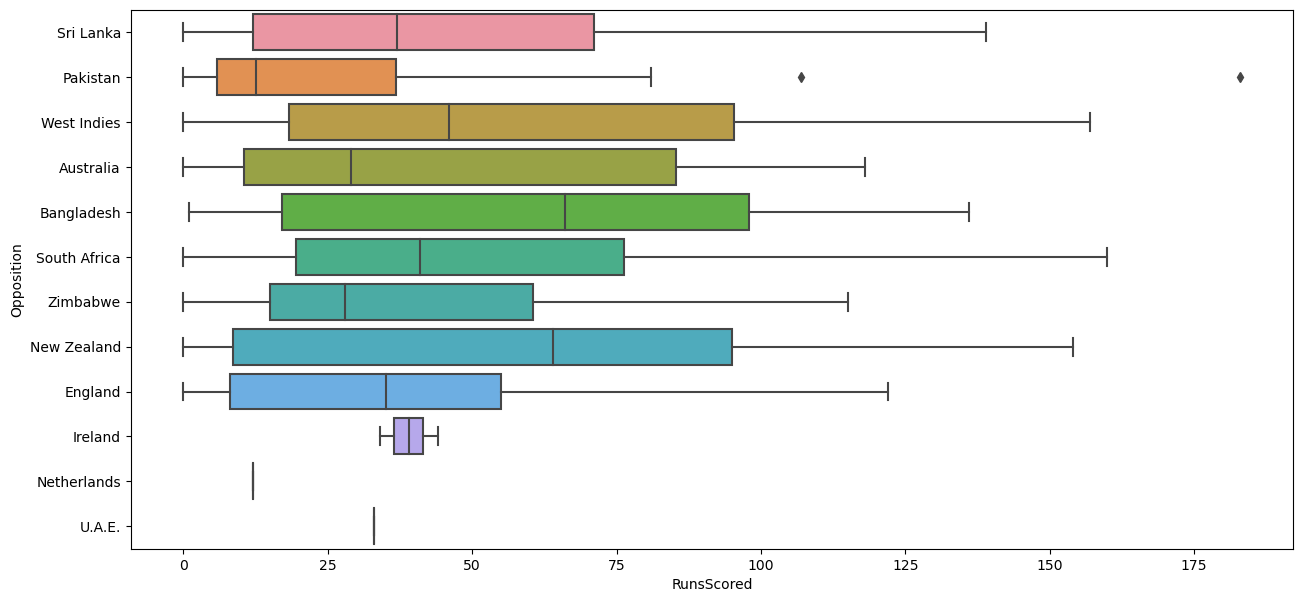

In [44]:
plt.figure(figsize=(15,7))
sns.boxplot(x= 'RunsScored', y='Opposition', data=mydata)
plt.show()

In [45]:


mydata[mydata["Opposition"]=="Bangladesh"]["RunsScored"].median() 



66.0

In [46]:
mydata[mydata["Opposition"]=="New Zealand"]["RunsScored"].median() 

64.0

In [47]:
mydata[mydata["Opposition"]=="Sri Lanka"]["RunsScored"].median() 

37.0

#### Highest Median is against Bangladesh. As seen in the above plot for countries like Bangladesh and New Zealand he has scored above 66 and 64 respectively in 50% of the matches played against each of them, While against Sri Lanka he has scored more then only 37 in 50% of the matches.


### 9. Comparing the runs scored by Kohli in 1st innings vs the 2nd innings

In [49]:
mydata.head()

,RunsScored,BallsFaced,BattingPosition,Dismissal,Inning,Opposition,Year
0,12,22,2,LBW,1,Sri Lanka,2008
1,37,67,2,Caught,2,Sri Lanka,2008
2,25,38,1,Run out,1,Sri Lanka,2008
3,54,66,1,Bowled,1,Sri Lanka,2008
4,31,46,1,LBW,2,Sri Lanka,2008


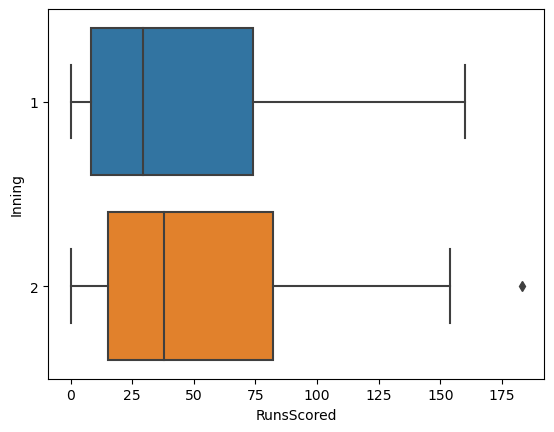

In [50]:
sns.boxplot(x='RunsScored', y= 'Inning', data = mydata, orient ='h')
plt.show()

#### Kohli, known as one of the best chasers in world cricket, as we we see has from the plot, has better run scoring ability in the 2nd innings while chasing. His highest score has also come in while chasing.


### 10. Pre and Post transformation comparison.

#### It is well known that Kohli started taking fitness much more seriously post an ordinary IPL in 2012. He changed his training regime and eating habits completely, realising the need to transform his body to survive the rigours of playing all three formats.

In [51]:
mydata['Post_Transformation'] = mydata['Year']>2012

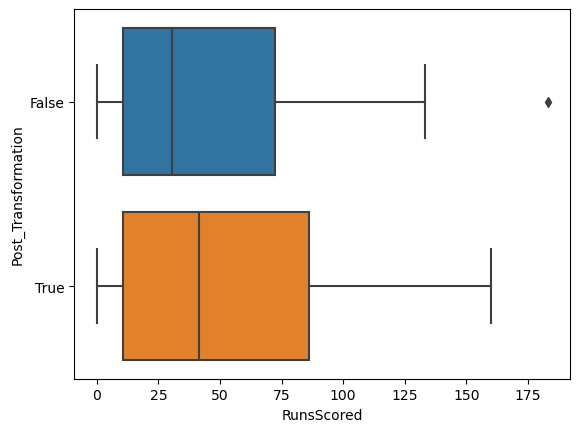

In [52]:
sns.boxplot(x= "RunsScored", y= "Post_Transformation",data = mydata, orient ='h')
plt.show()

#### We can see clearly from the plot, post transformation, he has been scoring more runs as the median value has shifted to the right.

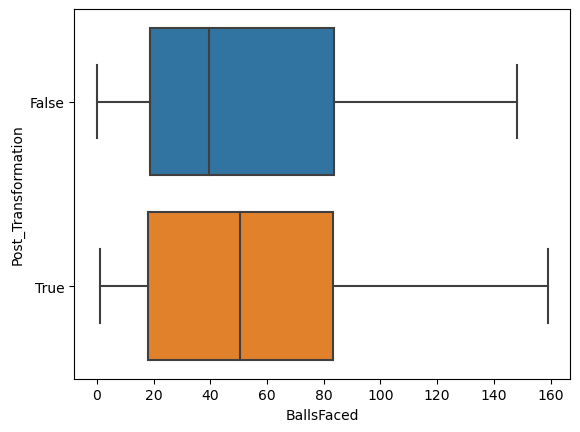

In [53]:
sns.boxplot(x= "BallsFaced", y= "Post_Transformation",data = mydata, orient ='h')
plt.show()

#### Post transformation, the median value for number of balls faced has also shifted to the right. This clearly shows his ability to play longer innings has improved post transformation


<Axes: xlabel='RunsScored', ylabel='Post_Transformation'>

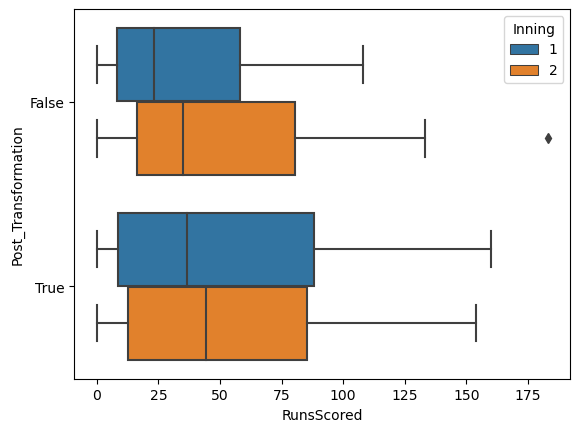

In [54]:
sns.boxplot(x= "RunsScored", y= "Post_Transformation",hue = 'Inning', data = mydata, orient ='h')

#### Clearly, Kohli was good at chasing as compared to batting first, prior he went through the transformation. But post transformation, he has significantly improved his run scoring ability batting first.

In [55]:
pd.crosstab(index = mydata['Post_Transformation'],columns = mydata['Dismissal'], values = mydata['RunsScored'],margins=True, aggfunc ='mean')


Dismissal,Bowled,Caught,Hit wicket,LBW,NO,Run out,Stumped,All
Post_Transformation,,,,,,,,
False,27.454545,42.000000,107.0,23.750000,82.166667,42.0,16.5,44.159091
True,56.400000,42.397260,NaN,40.000000,80.480000,50.0,107.5,52.883333
All,41.238095,42.239669,107.0,29.166667,81.027027,46.0,62.0,49.192308


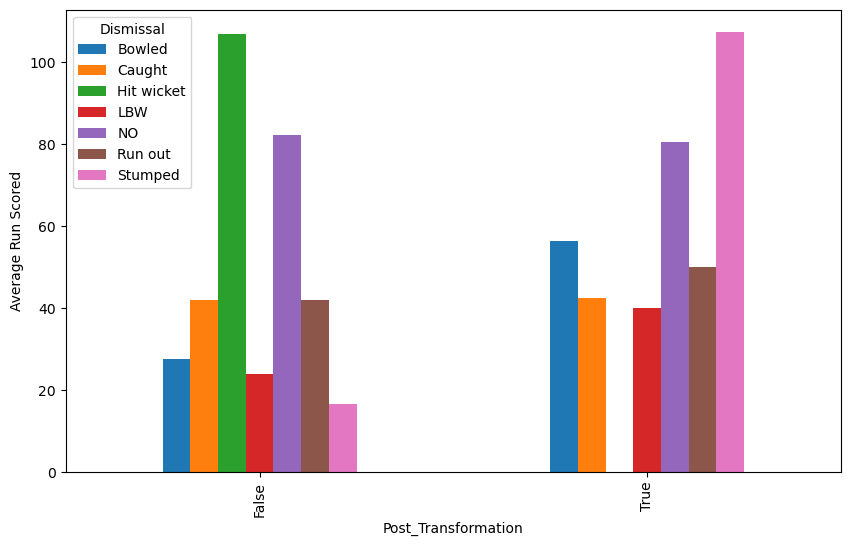

In [57]:
ct = pd.crosstab(index = mydata['Post_Transformation'],columns=mydata['Dismissal'],values = mydata['RunsScored'],margins=True, aggfunc ='mean')
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(figsize = (10,6))
plt.ylabel("Average Run Scored")
plt.show()

#### The average score before getting stumped and bowled has drastically improved post transformation. Average runs scored before 'Run Out' has also improved. The average score before getting stumped and bowled has drastically improved post transformation. Average runs scored before 'Run Out' has also improved.

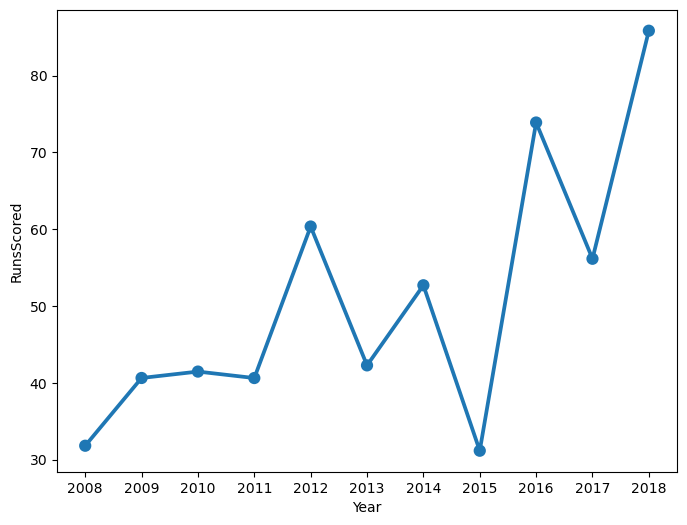

In [66]:
plt.figure(figsize=(8,6))
sns.pointplot(x= 'Year', y ='RunsScored',data = mydata,ci=None);
plt.show()

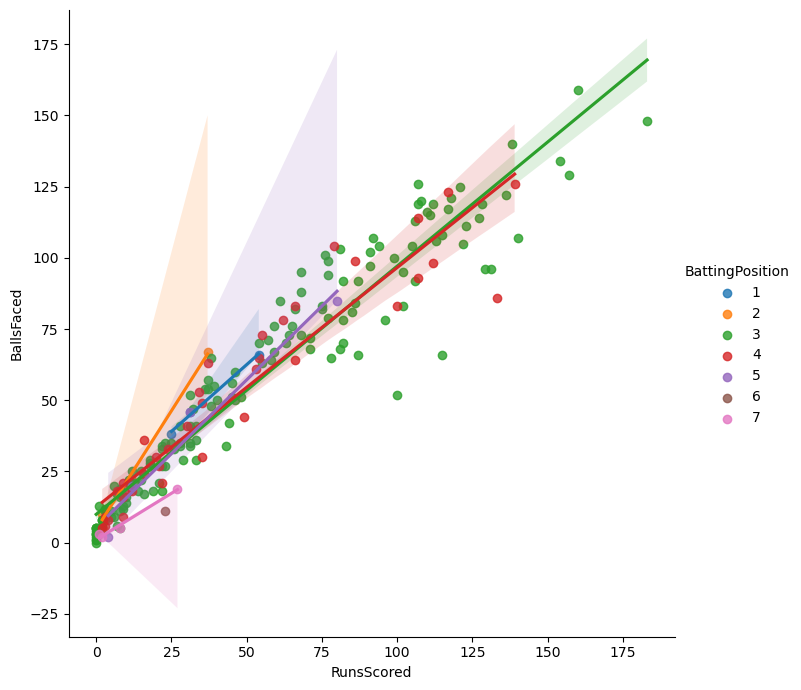

In [67]:
sns.lmplot(x="RunsScored", y="BallsFaced",hue='BattingPosition', data=mydata,height=7)
plt.show()

#### The relationship is linear between RunsScored & BallsFaced over all the batting positions. At position number 3 number of balls faced is highest and highest score also stands at batting position 3.

### How the batting position has changed with different oppositions yearly?

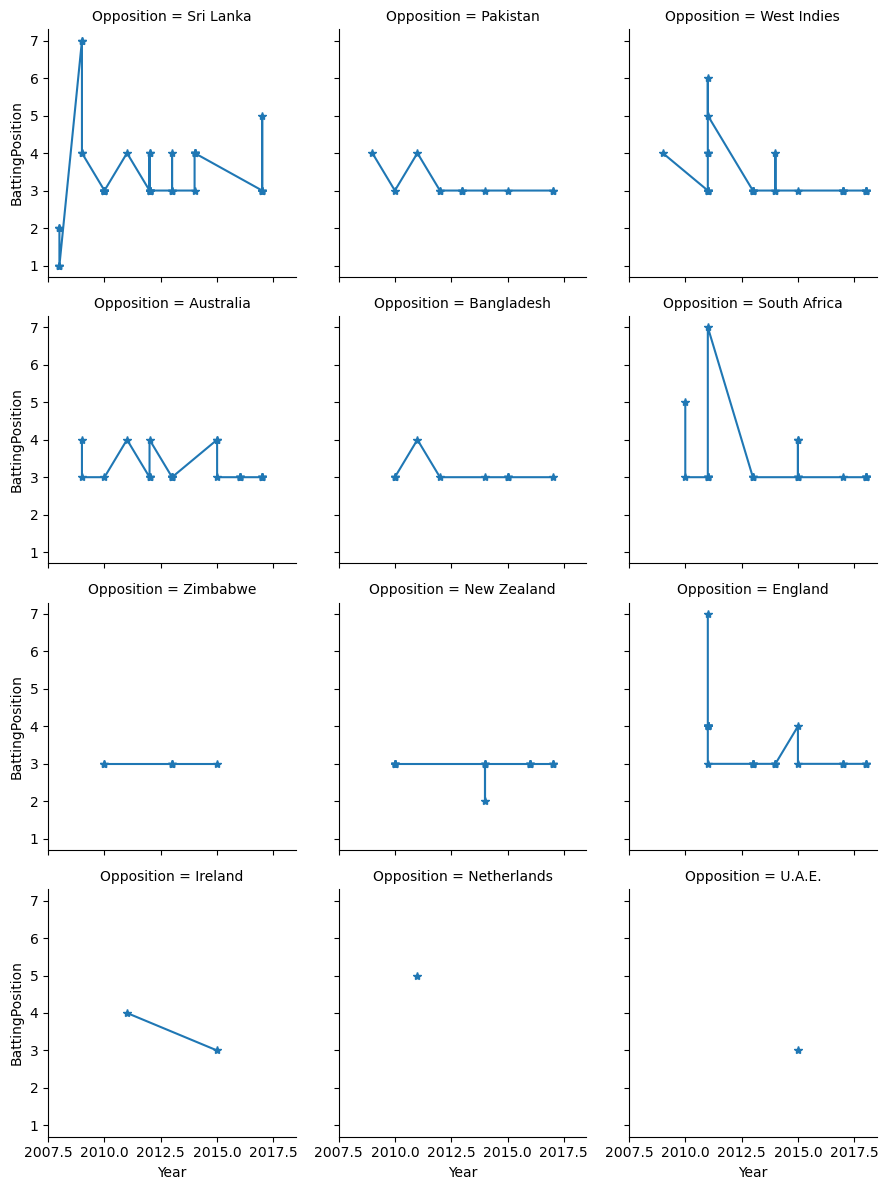

In [68]:
g = sns.FacetGrid(mydata, col="Opposition", col_wrap=3, height=3)
g = g.map(plt.plot, "Year", "BattingPosition", marker="*")
plt.show()

#### 1. Against Pakistan, Bangladesh and Australia Kohli experimented playing only at two batting position ( Position-3 and 4).
#### 2.Against Sri Lanka he has been experimenting the highest: Has been an Opener and also batted at 7th position. Against West Indies, South Africa and England he has experimented a lot in coming at different batting positions.
#### 3Against Zimbabwe he has only batted at position 3.

